In [207]:
from sketch_coding_maxsketch_pruning_signed import  sketch_encoding, sketch_decoding
import numpy as np
import sys
import ctypes
import matplotlib.pyplot as plt


0.42383707
0.003311227075755596
128
36864


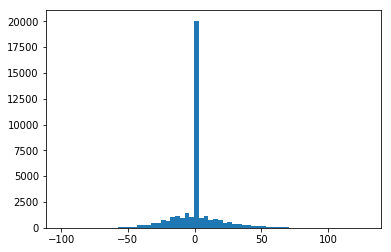

636

In [213]:
com_ratio = 0.5
base = 8
half_base_mask = 1<<(base-1)


# M = np.random.uniform(-half_base_mask * float_step, (half_base_mask - 1) * float_step, size=(shape1, shape1))
np.set_printoptions(threshold=np.nan)

M = np.load( "../test_weight.npy" )
max_abs = np.max(np.abs(M))
print(max_abs)
float_step = max_abs / (2**(base-1))
print(float_step)
M_int = (M/float_step).astype(int).reshape(-1)
print(np.max(M_int))
print(M_int.size)

plt.hist(M_int, bins=64)
plt.show()
np.sum(M_int > 48)

128


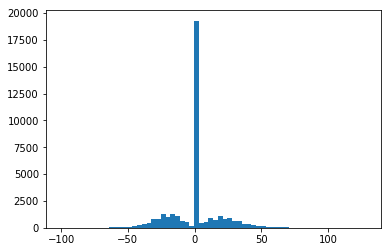

In [209]:
#M1 = sketch_transform(M, base, com_ratio, float_step)
#print((M1/float_step).astype(int))

sketch, indicator = sketch_encoding(M, base, com_ratio, float_step)
M1 = sketch_decoding(sketch, indicator, base, com_ratio, float_step)


M1_int = (M1/float_step).astype(int).reshape(-1)
print(np.max(M1_int))
plt.hist(M1_int, bins=64)
plt.show()

In [210]:
def count_false(_M, _M1, _float_step):
    _M = (_M/float_step).astype(int)
    _M1 = (_M1/float_step).astype(int)

    Diff = (_M != _M1)
    print(np.sum(np.sum(Diff)) / (_M1.shape[0]* _M1.shape[1]))



In [211]:
count_false(M, M1, float_step)

0.21885850694444445


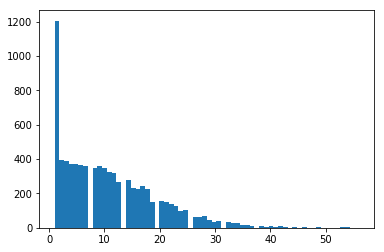

In [212]:
error = np.abs(M_int - M1_int)

error = error[np.nonzero(error)]
plt.hist(error, bins=64)
plt.show()